# Data Assimilation for Lorenz model

- 基本的なカオス系であるLorenzモデルを使用してデータ同化のデモンストレーションを行う
- Wikipedia: [ローレンツ方程式](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%83%BC%E3%83%AC%E3%83%B3%E3%83%84%E6%96%B9%E7%A8%8B%E5%BC%8F)

In [1]:
%matplotlib inline

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import DA

- 真の時系列を生成（答え合わせ用）

In [4]:
df = DA.misc.generate_l63_timeseries(dt=0.01, T=10000, x0=np.array([1.0, 0, 0]))[20:]

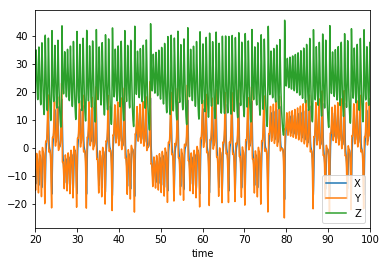

In [5]:
df.plot()

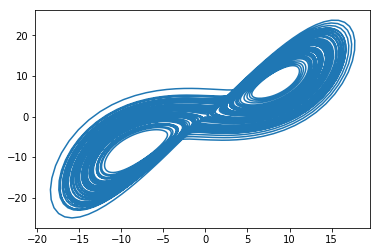

In [6]:
plt.plot(df["X"], df["Y"])

## Ensemble Transform Kalman Filter (ETKF)

- Xだけを観測するとする
- $\tau = 0.25$毎に観測する
- Xの観測では分散１のノイズが入る

In [7]:
H = DA.observation.head(3, 1) # 観測演算子
R = 1.0*np.eye(1)             # 観測ノイズの共分散行列
tau = 25
dt = 0.01
U = DA.model.RK4(DA.model.Lorenz63(p=10., r=28., b=8./3.), dt=dt, T=tau) # tau進む時間発展演算子
F = DA.ensemble.forcast(U)  # Forecast step
A = DA.ETKF.analysis(H, R)  # Analysis step

- アンサンブルを用意する

In [8]:
x0 = np.array(df.head(1))[0]

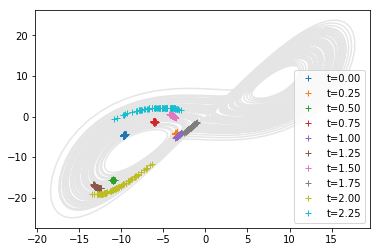

In [9]:
plt.plot(df["X"], df["Y"], "gray", alpha=0.2, label="")
xs = DA.ensemble.replica(x0, K=100, noise=0.1)
for t in range(10):
    xs = F(xs)
    plt.plot(xs[:, 0], xs[:, 1], "+", label="t={:.02f}".format(t*0.25))
plt.legend(loc=4)